# Kaggle DS Salaries EDA(Exploratory data analysis) task

In [1]:
# import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv(r'ds_salaries.csv')
data.head()

,Unnamed: 0,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,0,2020,MI,FT,Data Scientist,70000,EUR,79833,DE,0,DE,L
1,1,2020,SE,FT,Machine Learning Scientist,260000,USD,260000,JP,0,JP,S
2,2,2020,SE,FT,Big Data Engineer,85000,GBP,109024,GB,50,GB,M
3,3,2020,MI,FT,Product Data Analyst,20000,USD,20000,HN,0,HN,S
4,4,2020,SE,FT,Machine Learning Engineer,150000,USD,150000,US,50,US,L


In [3]:
data.isnull().sum()

Unnamed: 0            0
work_year             0
experience_level      0
employment_type       0
job_title             0
salary                0
salary_currency       0
salary_in_usd         0
employee_residence    0
remote_ratio          0
company_location      0
company_size          0
dtype: int64

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 607 entries, 0 to 606
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Unnamed: 0          607 non-null    int64 
 1   work_year           607 non-null    int64 
 2   experience_level    607 non-null    object
 3   employment_type     607 non-null    object
 4   job_title           607 non-null    object
 5   salary              607 non-null    int64 
 6   salary_currency     607 non-null    object
 7   salary_in_usd       607 non-null    int64 
 8   employee_residence  607 non-null    object
 9   remote_ratio        607 non-null    int64 
 10  company_location    607 non-null    object
 11  company_size        607 non-null    object
dtypes: int64(5), object(7)
memory usage: 57.0+ KB


In [5]:
# drop the Unnamed column
data.drop(['Unnamed: 0'],axis=1, inplace=True)

In [6]:
data.describe()

,work_year,salary,salary_in_usd,remote_ratio
count,607.000000,6.070000e+02,607.000000,607.00000
mean,2021.405272,3.240001e+05,112297.869852,70.92257
std,0.692133,1.544357e+06,70957.259411,40.70913
min,2020.000000,4.000000e+03,2859.000000,0.00000
25%,2021.000000,7.000000e+04,62726.000000,50.00000
50%,2022.000000,1.150000e+05,101570.000000,100.00000
75%,2022.000000,1.650000e+05,150000.000000,100.00000
max,2022.000000,3.040000e+07,600000.000000,100.00000


In [51]:
data.head(2)

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2020,MI,FT,Data Scientist,70000,EUR,79833,DE,0,DE,L
1,2020,SE,FT,Machine Learning Scientist,260000,USD,260000,JP,0,JP,S


In [73]:
data.job_title.value_counts().head(15)

Data Scientist                143
Data Engineer                 132
Data Analyst                   97
Machine Learning Engineer      41
Research Scientist             16
Data Science Manager           12
Data Architect                 11
Machine Learning Scientist      8
Big Data Engineer               8
Data Science Consultant         7
Data Analytics Manager          7
Director of Data Science        7
AI Scientist                    7
Principal Data Scientist        7
Lead Data Engineer              6
Name: job_title, dtype: int64

# EDA

In [22]:
# frequency table
work_years = pd.crosstab(index=data['work_year'],columns='count')
print(work_years)

col_0      count
work_year       
2020          72
2021         217
2022         318


In [53]:
pd.crosstab(index=data['work_year'], columns=data['employment_type'])

employment_type,CT,FL,FT,PT
work_year,,,,
2020,1,1,68,2
2021,3,2,206,6
2022,1,1,314,2


<Figure size 1440x576 with 0 Axes>

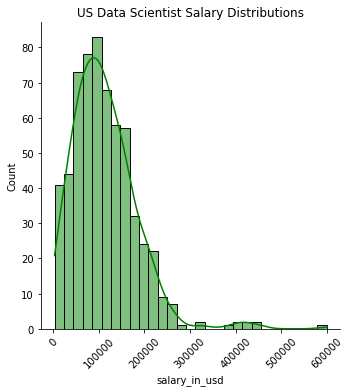

In [50]:
plt.figure(figsize=(20,8))
sns.displot(data['salary_in_usd'],color='green', kde=True)
plt.xticks(rotation=45)
plt.title('US Data Scientist Salary Distributions')
plt.show()

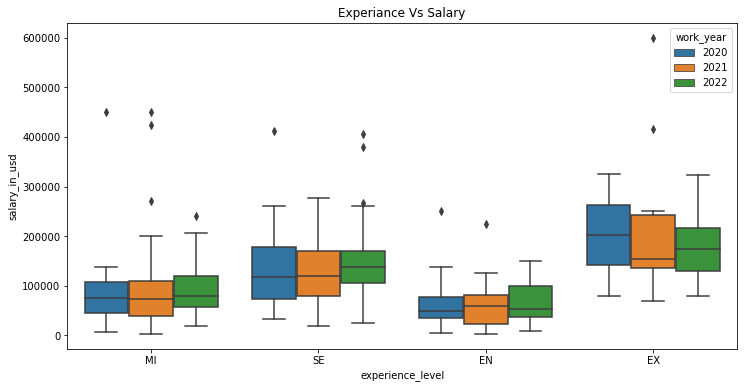

In [80]:
# Checking Outlier
plt.figure(figsize=(12,6))
sns.boxplot(x=data['experience_level'], y=data['salary_in_usd'], hue=data['work_year'])
plt.title("Experiance Vs Salary")
plt.show()

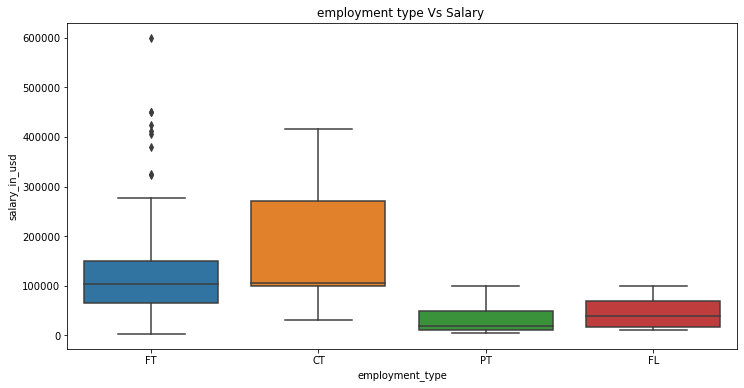

In [82]:
# Checking Outlier
plt.figure(figsize=(12,6))
sns.boxplot(x=data['employment_type'], y=data['salary_in_usd'])
plt.title("employment type Vs Salary ")
plt.show()

<AxesSubplot:xlabel='remote_ratio', ylabel='Count'>

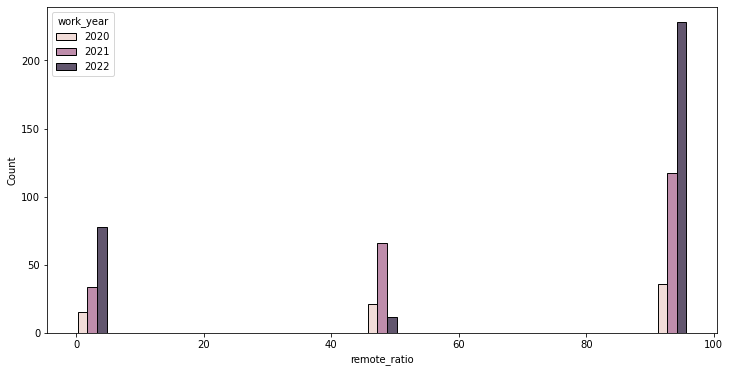

In [59]:
plt.figure(figsize=(12,6))
sns.histplot(x=data['remote_ratio'],data=data,hue='work_year',multiple='dodge',shrink=0.5)

([<matplotlib.patches.Wedge at 0x1cb24888d30>,
 [Text(0.987867897935327, 0.4838564004214872, 'EN'),
  Text(0.5516426486543617, 0.9516776703199464, 'EX'),
  Text(-0.7183891125301338, 0.8330168563709661, 'MI'),
  Text(0.13345981137661386, -1.091873838292373, 'SE')],
 [Text(0.5388370352374511, 0.2639216729571748, '14%'),
  Text(0.3008959901751064, 0.5190969110836071, '4%'),
  Text(-0.3918486068346184, 0.45437283074779966, '35%'),
  Text(0.07279626075088029, -0.5955675481594761, '46%')])

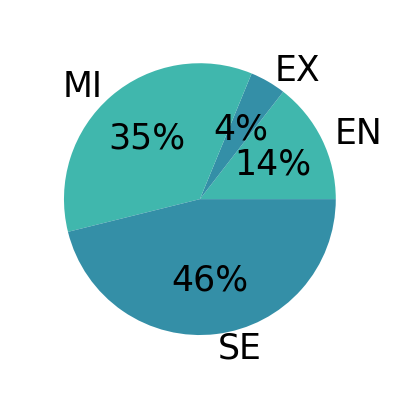

In [79]:
# ['MI','SE','EN','EX'],['Intermediate','Expert','Junior','Director']
plt.figure(figsize=(3,1.5),dpi=300)
colors = sns.color_palette('mako_r')[1:3]
plt.pie(x=data.groupby(['experience_level']).count()['work_year'], labels= data.groupby('experience_level').count().index,
        autopct='%1.0f%%',colors=colors, textprops={'fontsize':'smaller'})

([<matplotlib.patches.Wedge at 0x1cb265d5d60>,
 [Text(1.0996317007433307, 0.028462654836293386, 'CT'),
  Text(1.097113635925758, 0.07963460218876704, 'FL'),
  Text(-1.0999852669606178, 0.00569319502375129, 'FT'),
  Text(1.098527044104949, -0.05690635614800554, 'PT')],
 [Text(0.5997991094963622, 0.015525084456160026, '1%'),
  Text(0.598425619595868, 0.04343705573932747, '1%'),
  Text(-0.5999919637967006, 0.0031053791038643396, '97%'),
  Text(0.5991965695117903, -0.031039830626184834, '2%')])

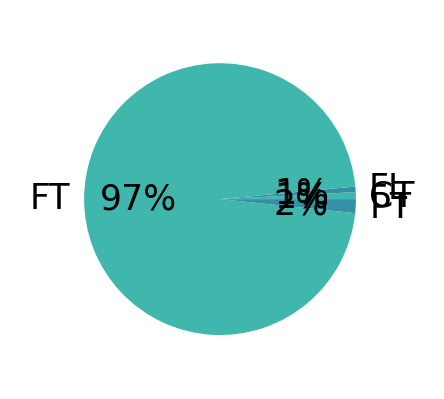

In [83]:
# ['MI','SE','EN','EX'],['Intermediate','Expert','Junior','Director']
plt.figure(figsize=(3,1.5),dpi=300)
colors = sns.color_palette('mako_r')[1:3]
plt.pie(x=data.groupby(['employment_type']).count()['work_year'], labels= data.groupby('employment_type').count().index,
        autopct='%1.0f%%',colors=colors, textprops={'fontsize':'smaller'})

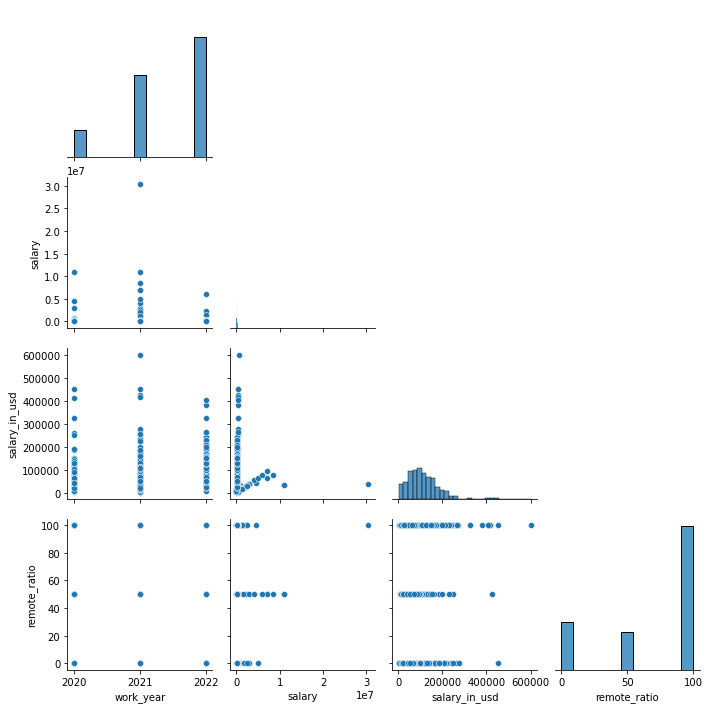

In [28]:
sns.pairplot(data, corner=True)

<AxesSubplot:>

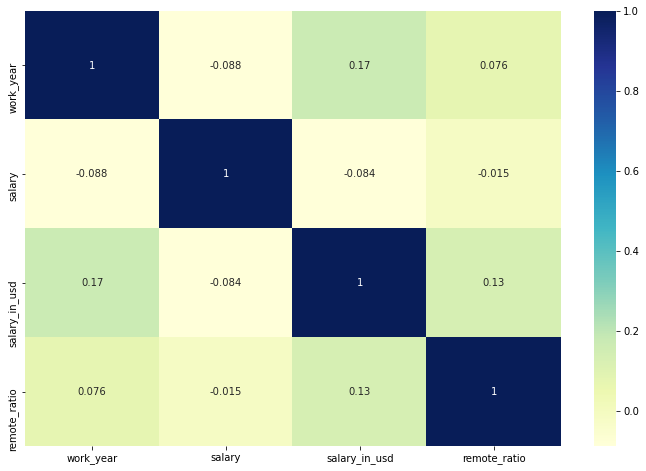

In [29]:
plt.subplots(figsize=(12, 8))
sns.heatmap(data.corr(), annot = True, cmap="YlGnBu")